In [ ]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy as scp
import arviz as az

In [ ]:
# 3.2
from scipy.stats import binom

def grid_approx(successes, trials, prior = None):    
    if prior is None:
        prior = np.ones(1000)
    p_grid = np.linspace(0,1,len(prior))
    prob_data = binom.pmf(successes, trials, p_grid)
    posterior = prob_data * prior
    posterior = posterior / sum(posterior)
    return p_grid, posterior

p_grid, posterior = grid_approx(6,9)
n = 10000
samples = np.random.choice(p_grid, size=n, replace=True, p=posterior)


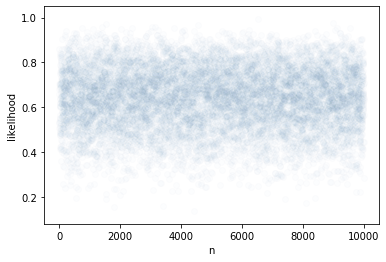

In [ ]:

fig, ax = plt.subplots()
ax.scatter(np.arange(n), samples, alpha=0.01)
ax.set(xlabel='n', ylabel='likelihood')
plt.show()

In [ ]:
# Getting interval of defined boundary

# get the _count_ of samples underneath 0.5
sum(samples < 0.5) / n

0.07157948948949147

In [ ]:

# 0.61 of posterior is between 0.75 and 0.5. Note the use of vector boolean operation &
sum((samples > 0.5) & (samples < 0.75)) / n

0.60655

In [ ]:
# Intervals of defined mass
np.quantile(samples, 0.8) # lower 80th percentile

np.quantile(samples, [0.1, 0.9]) # middle 80th percentile

array([0.44844845, 0.81081081])

In [ ]:
# If distribution is very skewed these percentile intervals don't tell the full story. 
# Take for example 3 W out of 3 tosses
p_grid = np.linspace(0,1,1000)
prob_p = np.ones(1000)
prob_data = binom.pmf(3,3, p_grid)
posterior = prob_data * prob_p
posterior = posterior / sum(posterior)
n = 10000
samples = np.random.choice(p_grid, size=n, replace=True, p=posterior)

In [ ]:
# get middle 50%
middle_50 = np.quantile(samples, [0.25, 0.75])

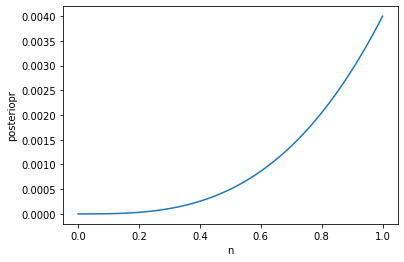

In [ ]:

fig, ax = plt.subplots()
ax.plot(p_grid, posterior)
ax.set(xlabel='probability of water p', ylabel='posterior')
plt.show()

Text(0.5, 1.0, '50% highest probability density interval')

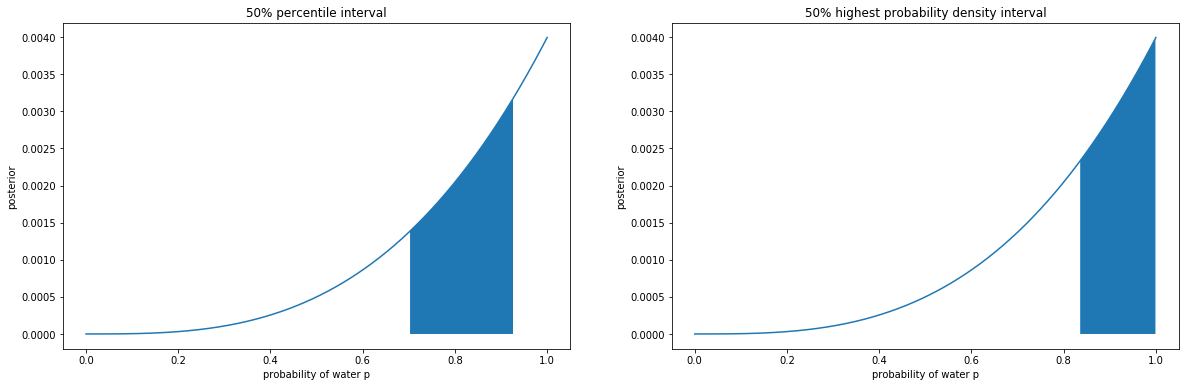

In [ ]:
plt.figure(figsize=(20,6)) 

pi_interval = np.quantile(samples, [0.25, 0.75])
plt.subplot(1, 2, 1)
plt.plot(p_grid, posterior)
plt.fill_between(p_grid, posterior, where= (p_grid > pi_interval[0]) & (p_grid < pi_interval[1]))
plt.xlabel('probability of water p')
plt.ylabel('posterior')
plt.title('50% percentile interval')

hpdi_interval = az.hdi(samples, hdi_prob=0.5)
plt.subplot(1, 2, 2)
plt.plot(p_grid, posterior)
plt.fill_between(p_grid, posterior, where= (p_grid > hpdi_interval[0]) & (p_grid < hpdi_interval[1]))
plt.xlabel('probability of water p')
plt.ylabel('posterior')
plt.title('50% highest probability density interval')



In [ ]:
hpdi_interval

array([0.48848849, 1.        ])

In [ ]:
a.reshape(-1,1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [ ]:
a


array([0, 1, 2, 3, 4])

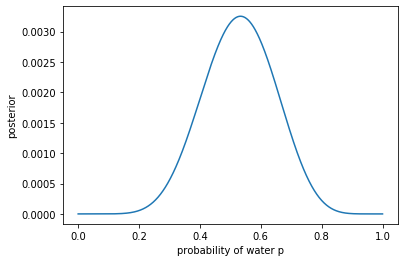

In [ ]:
# 3M1. Suppose the globe tossing data had turned out to be 8 water in 15 tosses.
# Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

p_grid, posterior = grid_approx(8, 15)

fig, ax = plt.subplots()
ax.plot(p_grid, posterior)
ax.set(xlabel='probability of water p', ylabel='posterior')
plt.show()


In [ ]:
#3M2. Draw 10,000 samples from the grid approximation from above.
# Then use the samples to calculate the 90% HPDI for p.

n = 10000
samples = np.random.choice(p_grid, size=n, replace=True, p=posterior)

az.hdi(samples, hdi_prob=0.9)

array([0.33833834, 0.72772773])

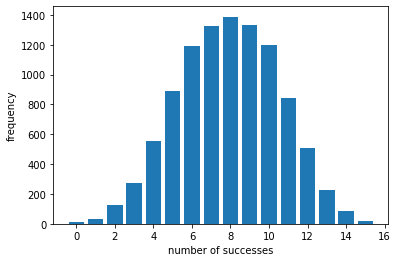

0.1388

In [ ]:
#3M3. Construct a posterior predictive check for this model and data. 
# This means simulate the distribution of samples, averaging over the posterior uncertainty in p.
# What is the probability of observing 8 water in 15 tosses?

# samples are samples posterior probabilities.
# we then try to simulate the random variable len(samples) times, using a different value of p each time
# this is going to be proportional to the posterior probabilities
simulations = binom.rvs(15, samples)


fig, ax = plt.subplots()
hist = np.bincount(simulations)
ax.bar(np.arange(len(hist)), hist)
ax.set(xlabel='number of successes', ylabel='frequency')
plt.show()

hist[8] / len(simulations)






In [ ]:
#3M4. Using the posterior distribution constructed from the new (8/15) data,
# now calculate the probability of observing 6 water in 9 tosses.
simulations = binom.rvs(9, samples)

# instead of using bin count we can do
sum(simulations == 6) / len(simulations)


0.1943

90% hdi interval [0.5005005  0.71371371]


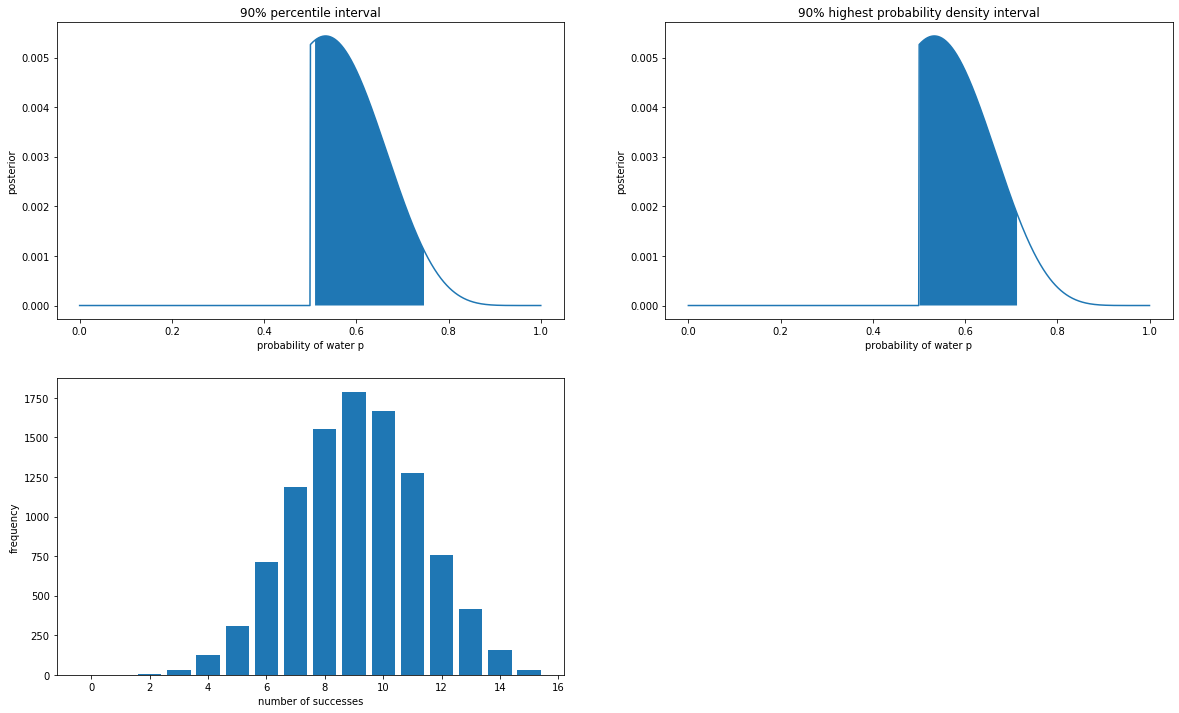

probability of 8 in 15 tosses 0.155
probability of 9 in 15 tosses 0.1784


In [ ]:
# 3M5. Startoverat3M1,butnowuseapriorthatiszerobelowp=0.5andaconstantabovep=0.5. 
# This corresponds to prior information that a majority of the Earth’s surface is water. 
# Repeat each problem above and compare the inferences. What difference does the better prior make? 
# If it helps, compare inferences (using both priors) to the true value p = 0.7.


prior = np.ones(1000)
prior[0:500] = 0
p_grid, posterior = grid_approx(8, 15, prior)
samples = np.random.choice(p_grid, size=n, replace=True, p=posterior)

plt.figure(figsize=(20,12)) 
pi_interval = np.quantile(samples, [0.05, 0.95])
plt.subplot(2, 2, 1)
plt.plot(p_grid, posterior)
plt.fill_between(p_grid, posterior, where= (p_grid > pi_interval[0]) & (p_grid < pi_interval[1]))
plt.xlabel('probability of water p')
plt.ylabel('posterior')
plt.title('90% percentile interval')

hpdi_interval = az.hdi(samples, hdi_prob=0.9)
print(f'90% hdi interval {hpdi_interval}')
plt.subplot(2, 2, 2)
plt.plot(p_grid, posterior)
plt.fill_between(p_grid, posterior, where= (p_grid > hpdi_interval[0]) & (p_grid < hpdi_interval[1]))
plt.xlabel('probability of water p')
plt.ylabel('posterior')
plt.title('90% highest probability density interval')

simulations = binom.rvs(15, samples)
hist = np.bincount(simulations)
plt.subplot(2, 2, 3)
plt.bar(np.arange(len(hist)), hist)
plt.xlabel('number of successes')
plt.ylabel('frequency')

plt.show()

print(f'probability of 8 in 15 tosses {sum(simulations == 8)/len(simulations)}')
print(f'probability of 9 in 15 tosses {sum(simulations == 9)/len(simulations)}')

# Probability of 9 is higher than 8, in that our simulations dont reflect our data anymore, but thats ok
# because we have an informative prior that is skewing the simulations


In [ ]:

birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])
print(f' number of boys:{sum(birth1) + sum(birth2)}')
print(f' number of births:{len(birth1) + len(birth2)}')

 number of boys:111
 number of births:200


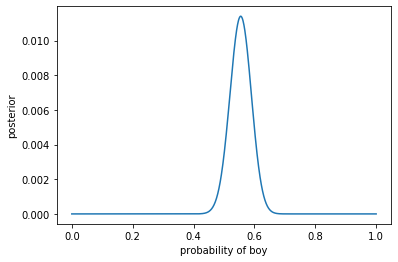

value of p that maximises posterior 0.5545545545545546


In [ ]:
# 3H1. Using grid approximation, compute the posterior distribution for the probability 
# of a birth being a boy. Assume a uniform prior probability. 
# Which parameter value maximizes the posterior probability?

p_grid, posterior = grid_approx(sum(birth1) + sum(birth2), len(birth1) + len(birth2))

fig, ax = plt.subplots()
ax.plot(p_grid, posterior)
ax.set(xlabel='probability of boy', ylabel='posterior')
plt.show()

print(f'value of p that maximises posterior {p_grid[np.argmax(posterior)]}')

In [ ]:
# 3H2. Using the sample function, draw 10,000 random parameter values from the posterior 
# distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% 
# highest posterior density intervals.

n = 10000
samples = np.random.choice(p_grid, size=n, replace=True, p=posterior)

print(f'50% highest posterior density interval {az.hdi(samples, hdi_prob=0.5)}')
print(f'89% highest posterior density interval {az.hdi(samples, hdi_prob=0.89)}')
print(f'97% highest posterior density interval {az.hdi(samples, hdi_prob=0.97)}')


50% highest posterior density interval [0.52752753 0.57357357]
89% highest posterior density interval [0.4964965  0.60760761]
97% highest posterior density interval [0.48048048 0.63063063]


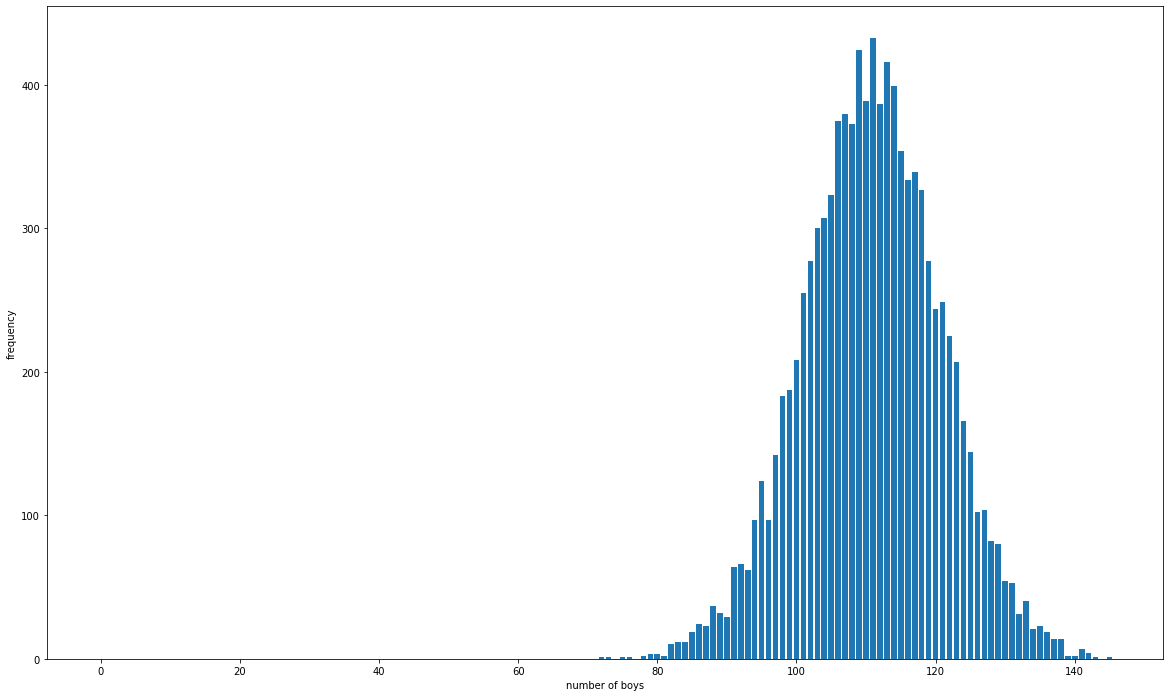

In [ ]:
# 3H3. Use rbinom to simulate 10,000 replicates of 200 births. 
# You should end up with 10,000 numbers, each one a count of boys out of 200 births. 
# Compare the distribution of predicted numbers of boys to the actual count in 
# the data (111 boys out of 200 births). There are many good ways to visualize the simulations, 
# but the dens command (part of the rethinking package) is probably the easiest way in this case.
# Does it look like the model fits the data well? That is, does the distribution of predictions 
# include the actual observation as a central, likely outcome?

simulations = binom.rvs(200, samples)
hist = np.bincount(simulations)
plt.figure(figsize=(20,12)) 
plt.bar(np.arange(len(hist)), hist)
plt.xlabel('number of boys')
plt.ylabel('frequency')

plt.show()

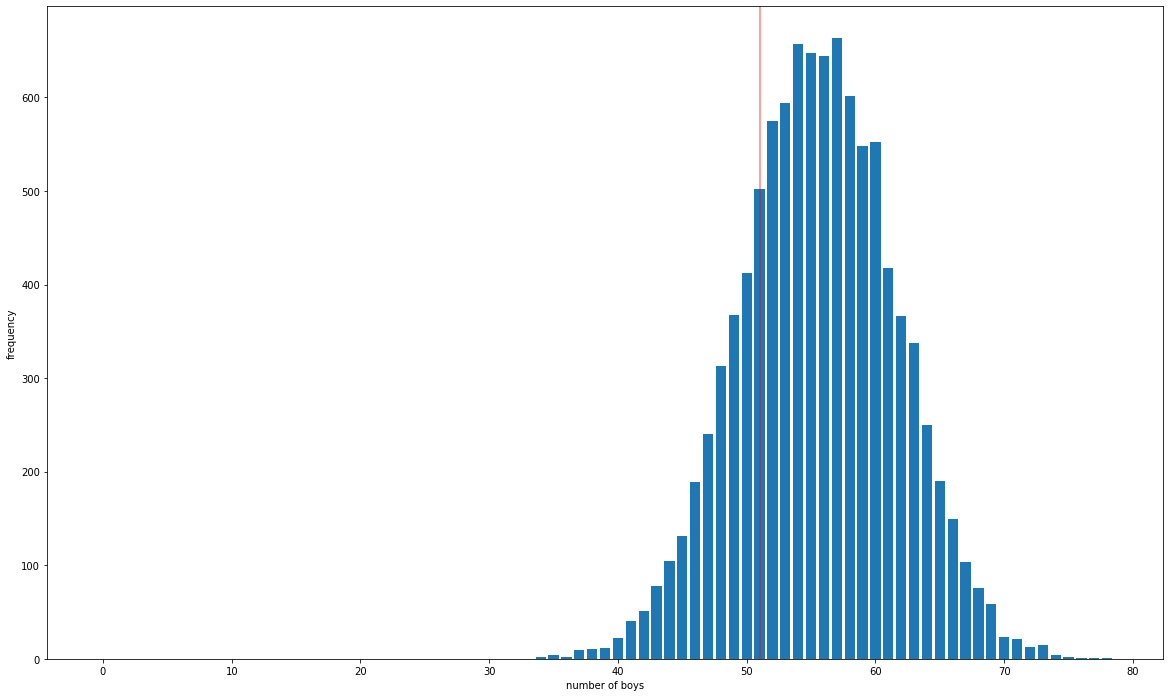

model doesnt look so good..


In [ ]:
# 3H4. Now compare 10,000 counts of boys from 100 simulated first borns only to the number 
# of boys in the first births, birth1. How does the model look in this light?

simulations = binom.rvs(len(birth1), samples)
hist = np.bincount(simulations)
plt.figure(figsize=(20,12)) 
plt.bar(np.arange(len(hist)), hist)
plt.axvline(sum(birth1), color = 'red', alpha=0.5)
plt.xlabel('number of boys')
plt.ylabel('frequency')

plt.show()

print('model doesnt look so good..')

num first born girls 49


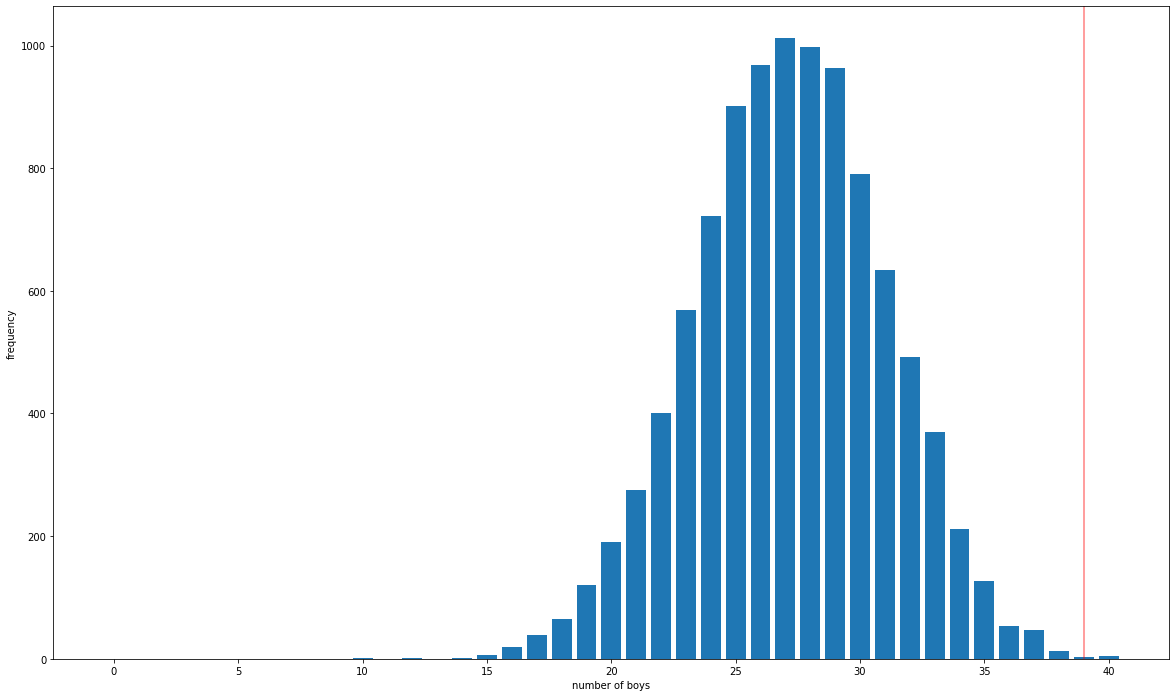

In [ ]:
# 3H5. The model assumes that sex of first and second births are independent.
# To check this assumption, focus now on second births that followed female 
# first borns. Compare 10,000 simulated counts of boys to only those second 
# births that followed girls. To do this correctly, you need to count the 
# number of first borns who were girls and simulate that many births, 10,000 times.
# Compare the counts of boys in your simulations to the actual observed count 
# of boys following girls. 
# How does the model look in this light? Any guesses what is going on in these data?

num_first_born_girls = sum(birth1 == 0)
num_boys_born_to_first_born_girls = sum(birth2[birth1 == 0])

print(f'num first born girls {num_first_born_girls}')

simulations = binom.rvs(num_first_born_girls, samples)
hist = np.bincount(simulations)
plt.figure(figsize=(20,12)) 
plt.bar(np.arange(len(hist)), hist)
plt.axvline(num_boys_born_to_first_born_girls, color = 'red', alpha=0.5)
plt.xlabel('number of boys')
plt.ylabel('frequency')

plt.show()


array([False,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False])

In [ ]:
np.arange(2,3)

array([2])

In [ ]:
np.bincount(np.array([0,34]))


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
help(az.stats.kde)


Help on function kde in module arviz.stats.density_utils:

kde(x, circular=False, **kwargs)
    One dimensional density estimation.
    
    It is a wrapper around ``kde_linear()`` and ``kde_circular()``.
    
    Parameters
    ----------
    x: 1D numpy array
        Data used to calculate the density estimation.
    circular: bool, optional
        Whether ``x`` is a circular variable or not. Defaults to False.
    **kwargs
        Arguments passed to ``kde_linear()`` and ``kde_circular()``.
        See their documentation for more info.
    
    Returns
    -------
    grid: Gridded numpy array for the x values.
    pdf: Numpy array for the density estimates.
    bw: optional, the estimated bandwidth.
    
    Examples
    --------
    Default density estimation for linear data
    
    .. plot::
        :context: close-figs
    
        >>> import numpy as np
        >>> import matplotlib.pyplot as plt
        >>> from arviz import kde
        >>>
        >>> rvs = np.random.gamma